Digit Recognition With Trained Keras+Tensorflow Model
===========================
 
<table>
<tr><td>
<img src="https://keras.io/img/keras-logo-small.jpg" width=150>
</td>
<td>
<img src="https://www.tensorflow.org/_static/images/tensorflow/logo.png" width=150>
</td></tr>
</table>

You will need to have Keras 1.2.1 and TensorFlow installed, both available as conda packages.

```
conda install -c conda-forge keras tensorflow
```

This is based on François Chollet's (author of Keras) Convolutional Neural Net example. <a href='http://twitter.com/fchollet'>@fchollet</a>

You will need to have already trained the model and saved it to disk.  You should have it in a file called:

**`tf_digit_model_10epoch_10class_128batch.h5`**

Test Data: Load and Prep
----------------------

We repeat these steps so you can, if you choose, restart your kernel and then just execute from here

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import os

import tensorflow as tf

from   keras.backend.tensorflow_backend import set_session
from   keras.datasets import mnist
from   keras          import backend as K
from   keras.utils    import np_utils

img_rows, img_cols = 28, 28 # input image dimensions
nb_classes         = 10

# Limit GPU memory consumption to 30%

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
set_session(tf.Session(config=config))

os.environ['KERAS_BACKEND'] = 'tensorflow'

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
if K.image_dim_ordering() == 'th':
    X_train     = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test      = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train     = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test      = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_train /= 255
X_test  /= 255

In [6]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test  = np_utils.to_categorical(y_test, nb_classes)

Now score the model using the test set
------------------------------------

In [7]:
from keras.models import load_model

model = load_model('tf_digit_model_10epoch_10class_128batch.h5')

In [8]:
%%time
score   = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:',    score[0])
print('Test accuracy:', score[1])

Test score: 0.034891629751
Test accuracy: 0.9879
CPU times: user 12 s, sys: 1.18 s, total: 13.2 s
Wall time: 3.1 s


Analyze the prediction failures
-----------------------------

In [9]:
y_predict = model.predict_classes(X_test)
fails     = y_predict != y_test

 9856/10000 [============================>.] - ETA: 0s

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_test_fails    = X_test[fails]
y_test_fails    = y_test[fails]
y_predict_fails = y_predict[fails]

What Does Failure Look Like?
--------------------------
Take a look at digits that were incorrectly recognized

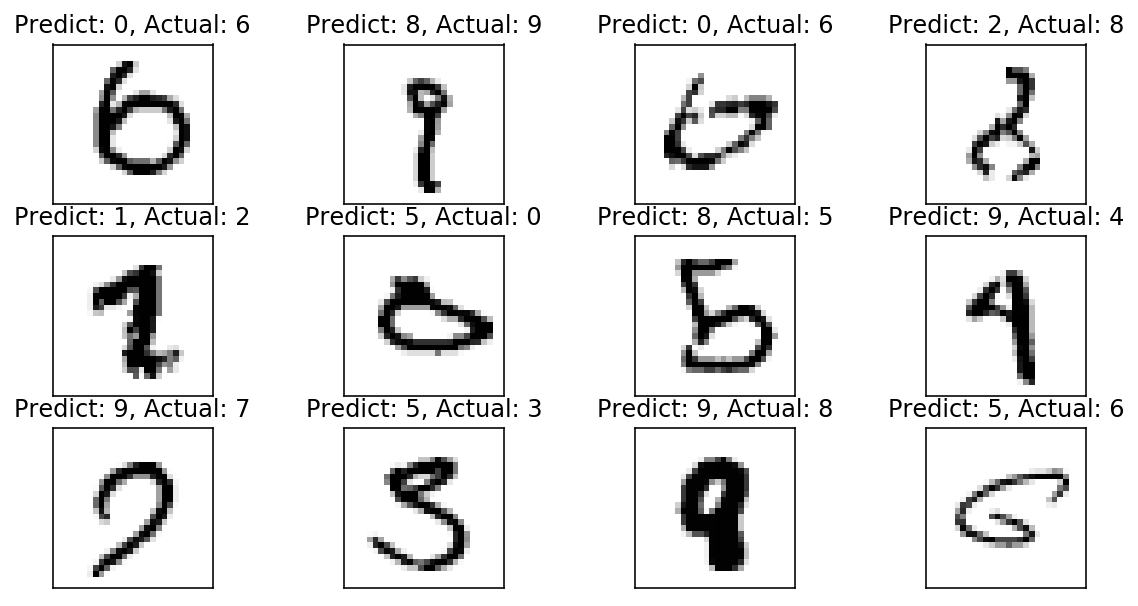

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5

for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_test_fails[i], cmap='gray_r')
    plt.title('Predict: %d, Actual: %d' % (y_predict_fails[i], y_test_fails[i]))
    plt.xticks([])
    plt.yticks([])
#plt.tight_layout()